In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [2]:
# Read the dataset
df = pd.read_csv(r"C:\Users\anjal\Downloads\tested.csv")
df


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [3]:
# Checking for missing values
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [4]:
# Filling missing values for 'Age' and 'Fare' columns with their means
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Fare'] = df['Fare'].fillna(df['Fare'].mean())

In [5]:

# Mapping 'Embarked' and 'Sex' to numerical values
df['Embarked'] = df['Embarked'].map({'Q': 0, 'S': 1, 'C': 2}).astype(int)
df['Sex'] = df['Sex'].map({'female': 1, 'male': 0}).astype(int)

In [6]:
# Converting 'Age' and 'Fare' to integer types
df['Age'] = df['Age'].astype(int)
df['Fare'] = df['Fare'].astype(int)

In [7]:
# Dropping unnecessary columns
data = df.drop(['PassengerId', 'Name', 'Cabin', 'Ticket'], axis=1)


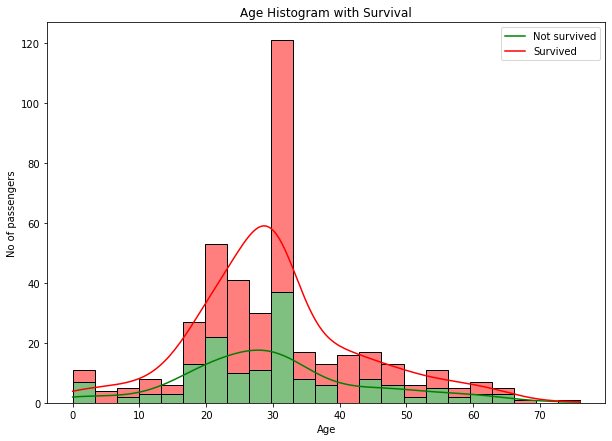

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Age histogram
plt.figure(figsize=(10, 7))
sns.histplot(df, x='Age', hue='Survived', multiple='stack', kde=True, palette={0: 'red', 1: 'green'})
plt.title('Age Histogram with Survival')
plt.xlabel('Age')
plt.ylabel('No of passengers')
plt.legend(labels=['Not survived', 'Survived'])
plt.show()


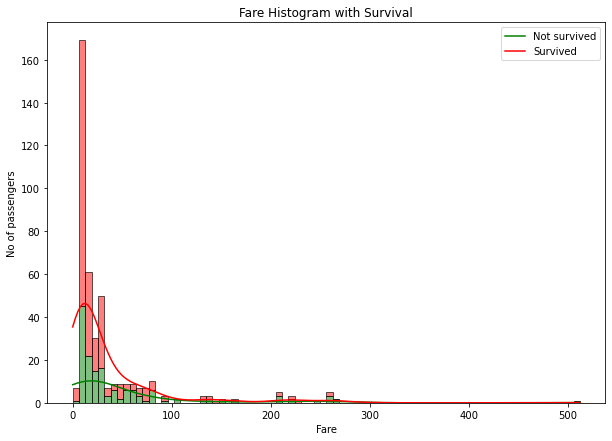

In [9]:
# Fare histogram
plt.figure(figsize=(10, 7))
sns.histplot(df, x='Fare', hue='Survived', multiple='stack', kde=True, palette={0: 'red', 1: 'green'})
plt.title('Fare Histogram with Survival')
plt.xlabel('Fare')
plt.ylabel('No of passengers')
plt.legend(labels=['Not survived', 'Survived'])
plt.show()

In [10]:
# Define features and target variable
X = data.drop(['Survived'], axis=1)
y = data['Survived']

# Splitting the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


In [11]:
# Logistic Regression model
logistic_model = LogisticRegression(solver='liblinear', max_iter=200)
logistic_model.fit(x_train, y_train)
y_pred = logistic_model.predict(x_test)
accuracy = accuracy_score(y_pred, y_test)
print(f'Logistic regression accuracy: {accuracy*100:.2f}%')


Logistic regression accuracy: 100.00%


In [12]:
from sklearn.metrics import confusion_matrix

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[58  0]
 [ 0 26]]
